Dataset Shape: (918, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

First few rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     

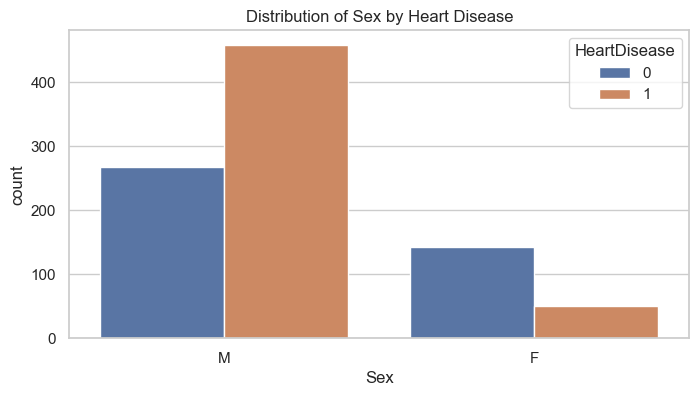


Distribution of ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


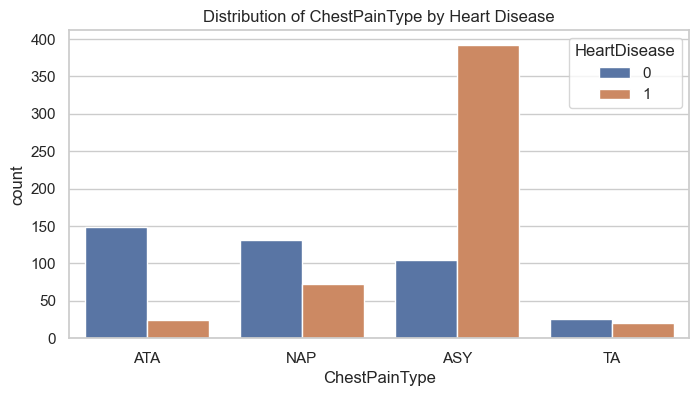


Distribution of RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


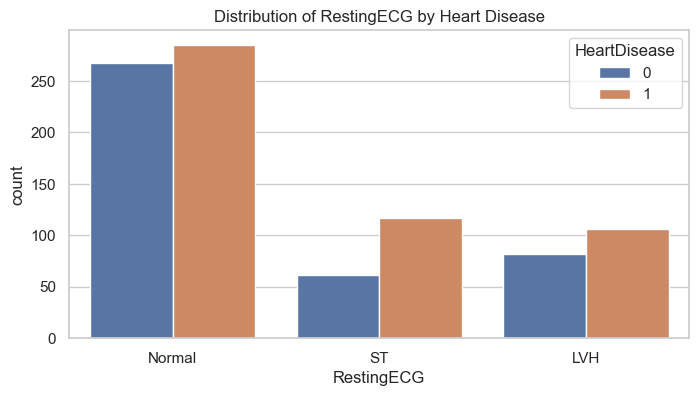


Distribution of ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


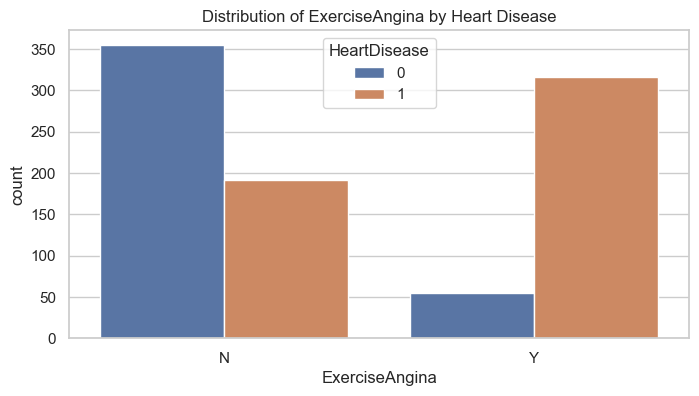


Distribution of ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


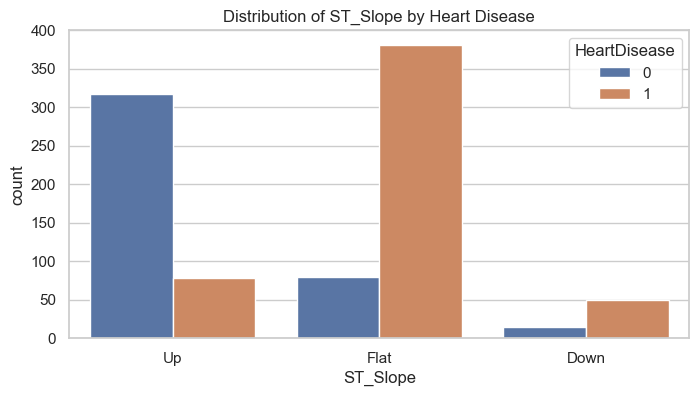

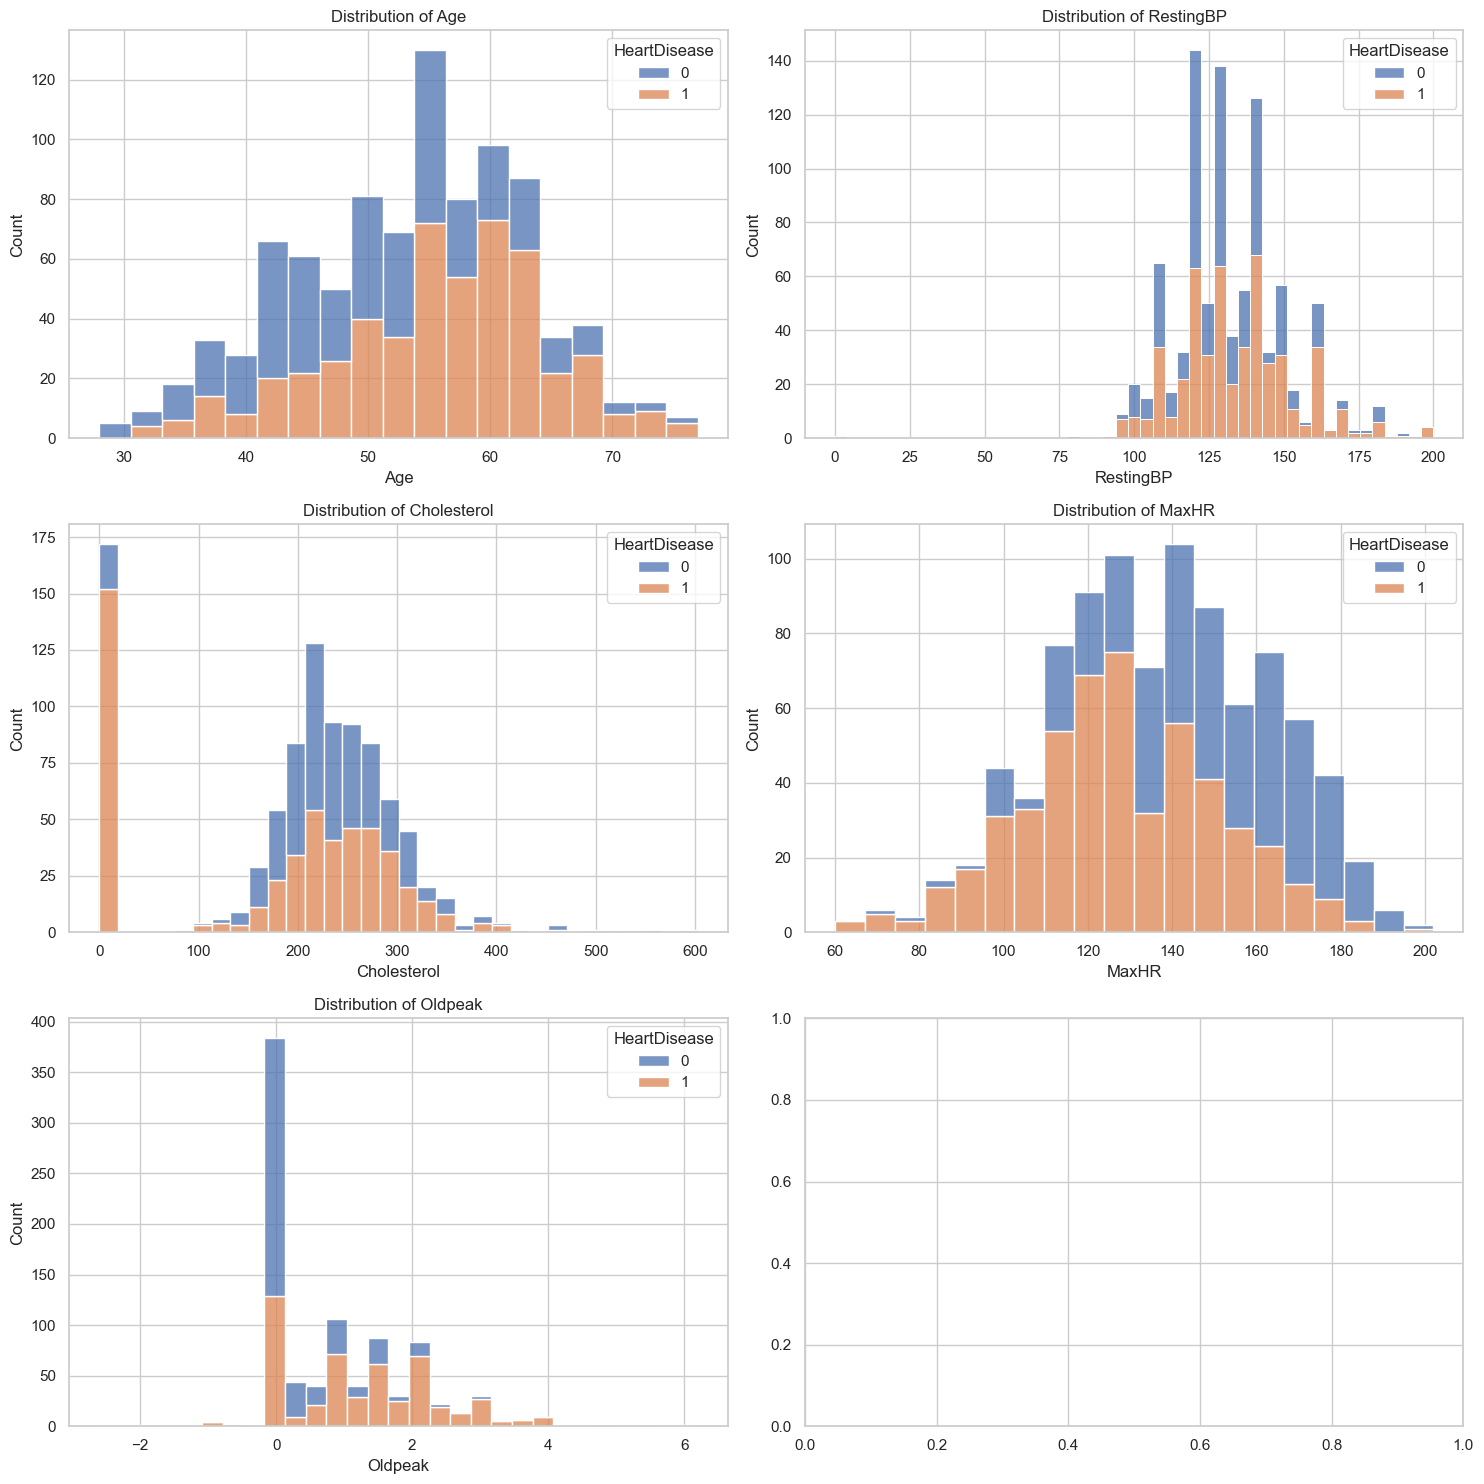

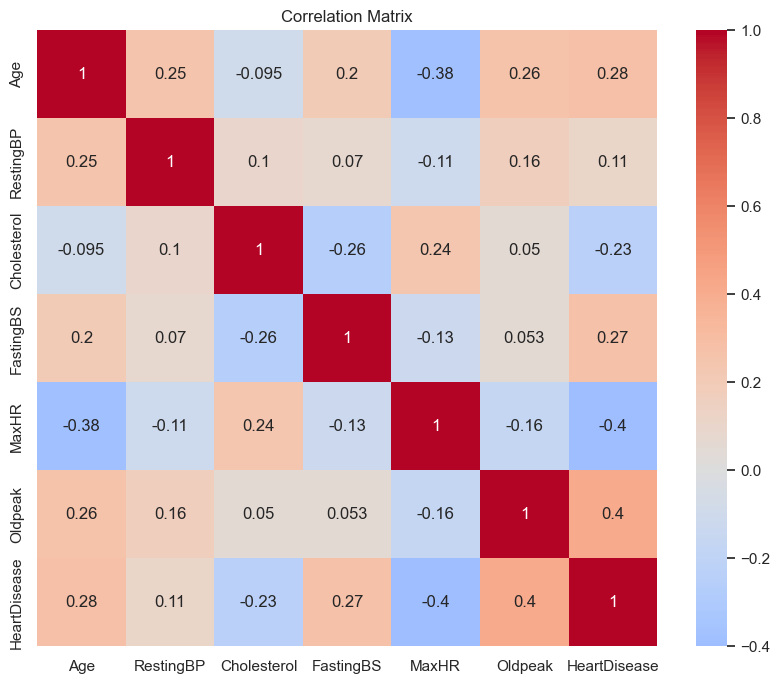

Preprocessed data and transformers have been saved.


In [5]:
#!/usr/bin/env python3
"""
Heart Disease Prediction - Data Preparation
This script focuses on loading, cleaning, and preparing the heart disease dataset for model training.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import os

# Create necessary directories if they don't exist
os.makedirs('../data', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid", palette="deep")

def load_and_display_data():
    """Load the dataset and display basic information."""
    df = pd.read_csv('../data/heart_failure_data.csv')
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    df.info()
    print("\nFirst few rows:")
    print(df.head())
    return df

def analyze_data(df):
    """Analyze data distributions and check for missing values."""
    print("Missing values:")
    print(df.isnull().sum())
    print("\nBasic statistics:")
    print(df.describe())

def analyze_categorical_data(df):
    """Analyze categorical variables."""
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    
    for col in categorical_cols:
        print(f"\nDistribution of {col}:")
        print(df[col].value_counts())
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue='HeartDisease')
        plt.title(f'Distribution of {col} by Heart Disease')
        plt.show()

def analyze_numerical_data(df):
    """Analyze numerical features."""
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    axes = axes.ravel()
    
    for idx, col in enumerate(numerical_features):
        sns.histplot(data=df, x=col, hue='HeartDisease', multiple="stack", ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

def create_correlation_matrix(df):
    """Create and display correlation matrix."""
    numerical_df = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

def preprocess_data(df):
    """Preprocess the data for model training."""
    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    
    df_encoded = df.copy()
    label_encoders = {}
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
    
    # Separate features and target
    X = df_encoded.drop('HeartDisease', axis=1)
    y = df_encoded['HeartDisease']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrames
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoders

def save_preprocessed_data(X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoders):
    """Save preprocessed data and transformers."""
    # Save preprocessed data
    np.save('../data/X_train_scaled.npy', X_train_scaled)
    np.save('../data/X_test_scaled.npy', X_test_scaled)
    np.save('../data/y_train.npy', y_train)
    np.save('../data/y_test.npy', y_test)
    
    # Save scaler and label encoders
    joblib.dump(scaler, '../models/scaler.pkl')
    joblib.dump(label_encoders, '../models/label_encoders.pkl')
    
    print("Preprocessed data and transformers have been saved.")

def main():
    """Main function to run the data preparation pipeline."""
    # Load data
    df = load_and_display_data()
    
    # Analyze data
    analyze_data(df)
    analyze_categorical_data(df)
    analyze_numerical_data(df)
    create_correlation_matrix(df)
    
    # Preprocess and save data
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoders = preprocess_data(df)
    save_preprocessed_data(X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoders)

if __name__ == "__main__":
    main()